In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical
from tensorflow import keras
import tensorflow as tf 
import matplotlib.pyplot as plt
import random

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

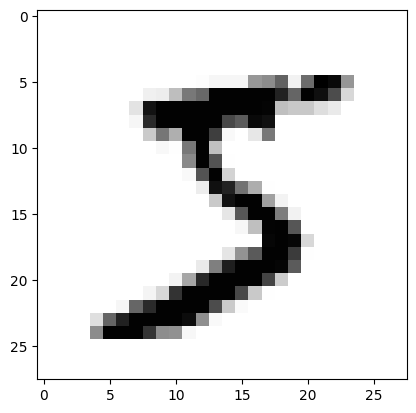

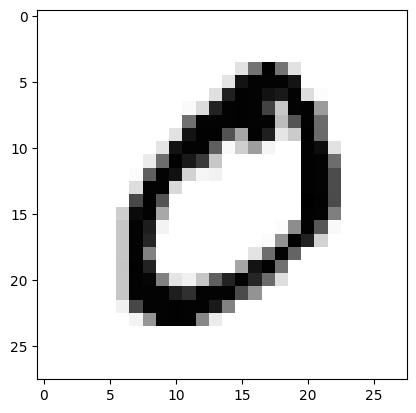

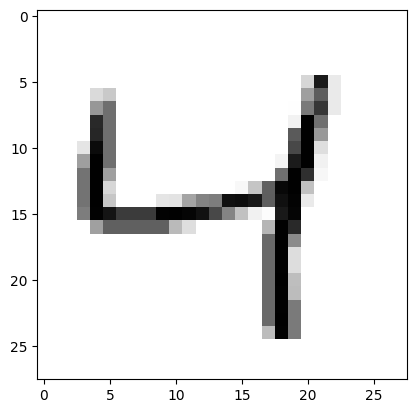

In [ ]:
for i in range(0,3):
  plt.imshow(x_train[i].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

# Reshape dimensions

In [ ]:
img_rows = 28 
img_cols = 28

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(input_shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


# Normalize

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# One Hot Encoding
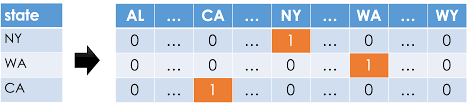

In [ ]:
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(y_train[2])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Armando el modelo
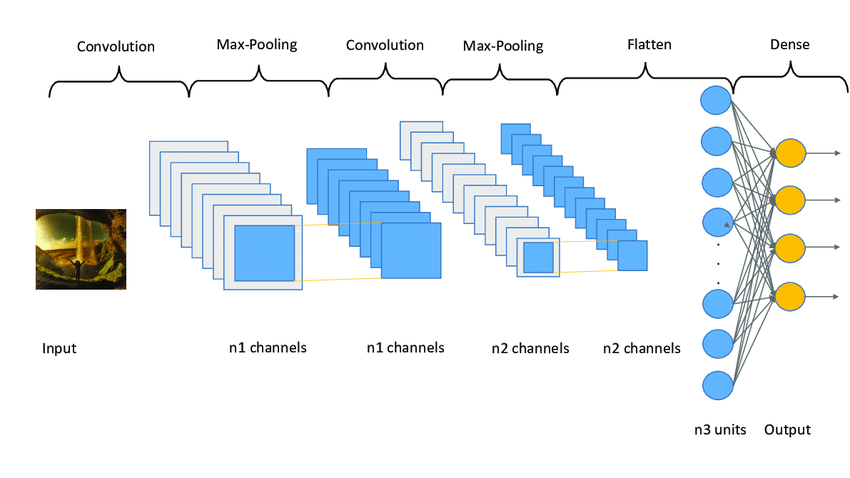

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

# Compilando el modelo
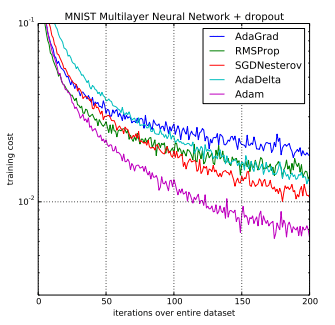

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])

# Entrenando el modelo

In [ ]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 480s 1s/step - loss: 0.2050 - accuracy: 0.9381 - val_loss: 0.0494 - val_accuracy: 0.9844
Epoch 2/5
469/469 [==============================] - 472s 1s/step - loss: 0.0723 - accuracy: 0.9789 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 3/5
469/469 [==============================] - 472s 1s/step - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0291 - val_accuracy: 0.9911
Epoch 4/5
469/469 [==============================] - 474s 1s/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 5/5
469/469 [==============================] - 472s 1s/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0248 - val_accuracy: 0.9916


# Evaluando resultados

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10594155639410019
Test accuracy: 0.9685999751091003
